In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_parquet('/home/jagac/projects/taxi-tip-mlapp/Research/yellow_tripdata_2023-04.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-04-01 00:14:49,2023-04-01 00:45:01,2.0,4.90,1.0,N,48,223,1,28.9,3.5,0.5,6.0,0.00,1.0,39.9,2.5,0.00
1,2,2023-04-01 00:00:24,2023-04-01 00:56:19,1.0,21.89,2.0,N,132,43,2,70.0,0.0,0.5,0.0,6.55,1.0,81.8,2.5,1.25
2,1,2023-04-01 00:03:50,2023-04-01 00:14:42,2.0,1.30,1.0,N,148,113,1,11.4,3.5,0.5,2.0,0.00,1.0,18.4,2.5,0.00
3,1,2023-04-01 00:53:18,2023-04-01 01:01:28,1.0,1.50,1.0,N,249,79,1,10.0,3.5,0.5,1.0,0.00,1.0,16.0,2.5,0.00
4,2,2023-04-01 00:07:00,2023-04-01 00:17:16,2.0,1.49,1.0,N,158,246,1,11.4,1.0,0.5,1.0,0.00,1.0,17.4,2.5,0.00


In [23]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

(0.0, 300.0)

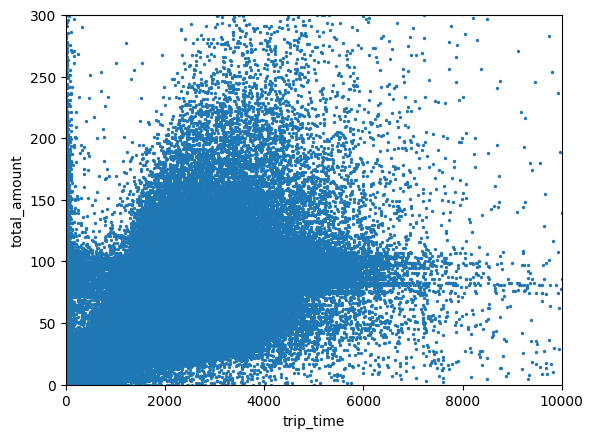

In [24]:
df['trip_time'] = (df.tpep_dropoff_datetime-df.tpep_pickup_datetime).astype('timedelta64[s]') / np.timedelta64(1, 's')
df.plot(x="trip_time", y="total_amount", kind="scatter", s=2)
plt.xlim(0,1e4)
plt.ylim(0,300)

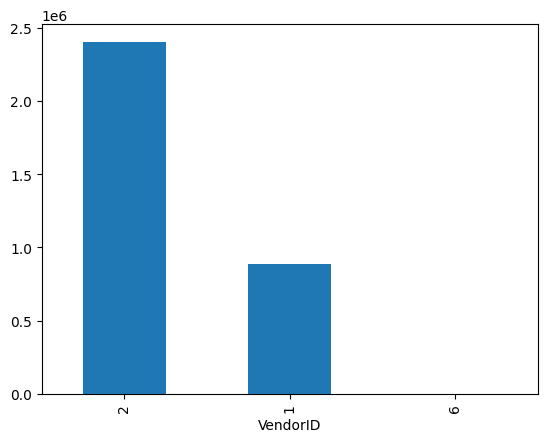

In [25]:
df.VendorID.value_counts().plot(kind="bar");

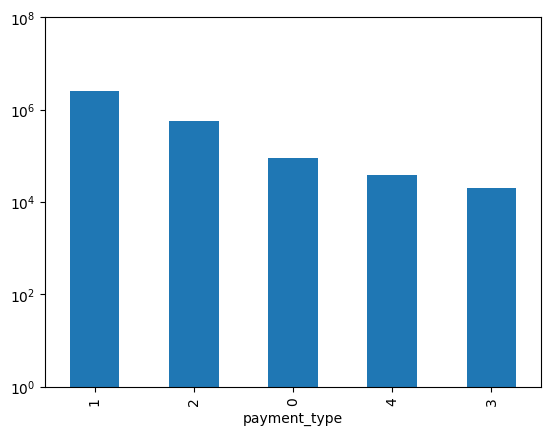

In [26]:
df['payment_type'].value_counts().plot(kind="bar", logy=True, ylim=(1,1e8));

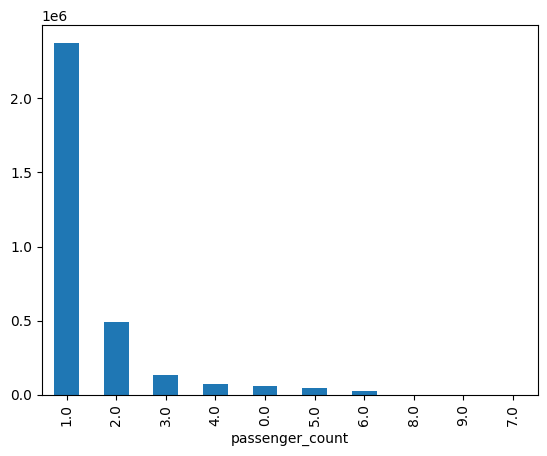

In [27]:
df.passenger_count.value_counts().plot(kind="bar");

In [31]:
print(len(df))
df = df[df['payment_type'] == 2]
df = df.reset_index(drop=True)
print(len(df))

3288250
0


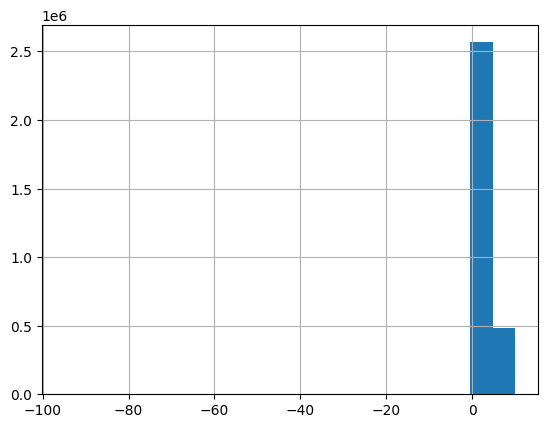

In [29]:
df[df['tip_amount'] < 10]['tip_amount'].hist(bins=20);